# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aprilyanto Setiyawan Siburian
- **Email:** m200d4ky1821@bangkit.academy
- **ID Dicoding:** M200D4KY1821

## Menentukan Pertanyaan Bisnis

- Bagaimana pola permintaan sepeda berubah sepanjang tahun?
- Bagaimana kita dapat mengelompokkan hari-hari dalam dataset berdasarkan pola penggunaan sepeda oleh pengguna casual dan terdaftar? (clustering)
- Bagaimana perusahaan sepeda dapat mengoptimalkan operasi dan strategi pemasarannya sepanjang tahun berdasarkan tren dan pola musiman dalam penggunaan sepeda oleh pengguna casual dan terdaftar? (time series analysis)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Dalam proyek analisis data ini, beberapa packages/library Python sangat penting untuk manipulasi data, perhitungan statistik dan visualisasi. Berikut ini adalah penjelasan singkat tentang empat library yang akan digunakan:

#### Pandas

- **Pandas** (`pandas`) menyediakan struktur data dan fungsi analisis yang mudah digunakan untuk manipulasi dan analisis data.
- `DataFrame` dan `Series` adalah struktur data utama yang digunakan untuk menganalisis data tabular dan berurutan.
- Mendukung operasi seperti penggabungan, reshaping, pemilihan, serta pembersihan data.

#### Matplotlib

- **Matplotlib** (`matplotlib.pyplot`) adalah library untuk membuat visualisasi statis, animasi, dan interaktif dalam Python.
- Memungkinkan pengguna untuk menghasilkan plot, histogram, grafik daya, diagram batang, diagram kesalahan, scatterplot, dll., dengan beberapa baris kode.
- Sangat fleksibel dan dapat disesuaikan, menjadikannya alat yang berguna untuk visualisasi data yang kuat dan publikasi kualitas grafik.

#### Seaborn

- **Seaborn** (`seaborn`) adalah library visualisasi data Python berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
- Menawarkan antarmuka yang lebih menarik dan beberapa pilihan plot yang lebih rumit dari matplotlib, termasuk kemampuan untuk membuat visualisasi statistik yang kompleks dengan kode yang lebih sederhana.
- Sering digunakan untuk mengeksplorasi dan memahami data melalui visualisasi yang menarik.

#### Statsmodels

- **Statsmodels** (`statsmodels`) adalah library Python yang menyediakan kelas dan fungsi untuk estimasi berbagai model statistik.
- Dapat digunakan untuk mengevaluasi model statistik, menguji hipotesis, dan menampilkan hasil dalam bentuk yang mudah dipahami.
- Menyediakan fungsi untuk analisis deret waktu, regresi linier, uji hipotesis, dan banyak lagi.
- Dapat digunakan untuk memecahkan masalah analisis data yang kompleks.

## Data Wrangling
**Data wrangling** merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data
Tahap **data wrangling**, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada tahap ini, kita mengumpulkan data dari file `day.csv` yang berisi data harian dari sistem peminjaman sepeda. Data ini terdiri dari 731 baris dan 16 kolom. Setiap baris mewakili satu hari dan setiap kolom mewakili satu atribut. Kita memuat data ini ke dalam DataFrame `day_df` menggunakan fungsi `pd.read_csv()` dari library `pandas`. Kemudian kita menampilkan lima baris pertama dari DataFrame tersebut menggunakan fungsi `head()`.


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada tahap ini, kita mengumpulkan data dari file `hour.csv` yang berisi data harian dari sistem peminjaman sepeda. Data ini terdiri dari 17379 baris dan 17 kolom. Setiap baris mewakili satu jam dan setiap kolom mewakili satu atribut. Kita memuat data ini ke dalam DataFrame `hour_df` menggunakan fungsi `pd.read_csv()` dari library `pandas. Kemudian kita menampilkan lima baris pertama dari DataFrame tersebut menggunakan fungsi `head()`.

### Assessing Data
Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Assessing Data: day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil di atas, kita dapat melihat bahwa DataFrame `day_df` terdiri dari 731 baris dan 16 kolom. Setiap kolom memiliki tipe data yang berbeda-beda. Terdapat beberapa kolom yang memiliki tipe data `object` yang seharusnya memiliki tipe data `datetime`. Selain itu, terdapat beberapa kolom yang memiliki tipe data `int64` yang seharusnya memiliki tipe data `category`. Kita akan melakukan perubahan tipe data pada kolom-kolom tersebut pada tahap selanjutnya.

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasil di atas, kita dapat melihat bahwa tidak ada tanda-tanda adanya outlier pada kolom-kolom yang memiliki tipe data `int64`. Walaupun terdapat beberapa kolom yang memiliki nilai minimum 0, namun hal ini tidak menjadi masalah karena nilai 0 tersebut masih masuk akal. Nilai maksimum dari setiap kolom juga tampak realistis, sehingga kita tidak perlu khawatir akan adanya outlier pada kolom-kolom tersebut.

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, kita dapat melihat bahwa tidak terdapat missing value pada DataFrame `day_df`. Hal ini menandakan bahwa kita tidak perlu melakukan penanganan missing value pada DataFrame `day_df`.

In [7]:
day_df.duplicated().sum()

0

Dari hasil di atas, kita dapat melihat bahwa tidak terdapat duplikat pada DataFrame `day_df`. Hal ini menandakan bahwa kita tidak perlu melakukan penanganan duplikat pada DataFrame `day_df`.

#### Assessing Data: hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil di atas, kita dapat melihat bahwa DataFrame `hour_df` terdiri dari 17379 baris dan 17 kolom. Setiap kolom memiliki tipe data yang berbeda-beda. Terdapat beberapa kolom yang memiliki tipe data `object` yang seharusnya memiliki tipe data `datetime`. Selain itu, terdapat beberapa kolom yang memiliki tipe data `int64` yang seharusnya memiliki tipe data `category`. Kita akan melakukan perubahan tipe data pada kolom-kolom tersebut pada tahap selanjutnya.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil di atas, kita dapat melihat bahwa tidak ada tanda-tanda adanya outlier pada kolom-kolom yang memiliki tipe data `int64`. Walaupun terdapat beberapa kolom yang memiliki nilai minimum 0, namun hal ini tidak menjadi masalah karena nilai 0 tersebut masih masuk akal. Nilai maksimum dari setiap kolom juga tampak realistis, sehingga kita tidak perlu khawatir akan adanya outlier pada kolom-kolom tersebut.

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, kita dapat melihat bahwa tidak terdapat missing value pada DataFrame `hour_df`. Hal ini menandakan bahwa kita tidak perlu melakukan penanganan missing value pada DataFrame `hour_df`.

In [11]:
hour_df.duplicated().sum()

0

Dari hasil di atas, kita dapat melihat bahwa tidak terdapat duplikat pada DataFrame `hour_df`. Hal ini menandakan bahwa kita tidak perlu melakukan penanganan duplikat pada DataFrame `hour_df`.

### Cleaning Data
Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data. Seluruh teknik tersebut akan kita pelajari pada beberapa materi ke depan.

#### Cleaning Data: day_df

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Dari hasil di atas, kita dapat melihat bahwa kita telah berhasil melakukan perubahan tipe data pada kolom-kolom yang seharusnya memiliki tipe data `category`. Selain itu, kita juga telah berhasil melakukan perubahan tipe data pada kolom `dteday` yang seharusnya memiliki tipe data `datetime`.

#### Cleaning Data: hour_df

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari hasil di atas, kita dapat melihat bahwa kita telah berhasil melakukan perubahan tipe data pada kolom-kolom yang seharusnya memiliki tipe data `category`. Selain itu, kita juga telah berhasil melakukan perubahan tipe data pada kolom `dteday` yang seharusnya memiliki tipe data `datetime`.

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Pada prosesnya, kita akan sering menggunakan berbagai teknik dan parameter dalam descriptive statistics yang bertujuan untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah. Selain itu, tidak jarang kita juga menggunakan visualisasi data untuk menemukan pola dan memvalidasi parameter descriptive statistics yang diperoleh.

### Explore Data: day_df

In [14]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasil di atas, kita dapat melihat bahwa:
- Rata-rata jumlah peminjaman sepeda harian adalah 4504.35.
- Rata-rata jumlah peminjaman sepeda harian pada hari kerja adalah 4584.82.
- Rata-rata jumlah peminjaman sepeda harian pada hari libur adalah 4339.02.
- Rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang baik adalah 4686.65.
- Rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang buruk adalah 1784.15.
- Rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang sangat buruk adalah 507.5.
- Rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang sangat buruk adalah 1.42.

Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada hari kerja lebih tinggi daripada rata-rata jumlah peminjaman sepeda harian pada hari libur. Selain itu, rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang baik lebih tinggi daripada rata-rata jumlah peminjaman sepeda harian pada hari-hari yang memiliki cuaca yang buruk dan sangat buruk.

In [15]:
day_df.groupby('season', observed=True)['cnt'].mean().reset_index()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada musim semi adalah 2604.13, rata-rata jumlah peminjaman sepeda harian pada musim panas adalah 4992.33, rata-rata jumlah peminjaman sepeda harian pada musim gugur adalah 5644.3, dan rata-rata jumlah peminjaman sepeda harian pada musim dingin adalah 4728.16. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada musim gugur lebih tinggi daripada rata-rata jumlah peminjaman sepeda harian pada musim lainnya.

In [16]:
day_df.groupby('mnth', observed=True)['cnt'].mean().reset_index()

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada hari Senin adalah 4338.12, rata-rata jumlah peminjaman sepeda harian pada hari Selasa adalah 4550.96, rata-rata jumlah peminjaman sepeda harian pada hari Rabu adalah 4690.29, rata-rata jumlah peminjaman sepeda harian pada hari Kamis adalah 4730.5, rata-rata jumlah peminjaman sepeda harian pada hari Jumat adalah 4690.65, rata-rata jumlah peminjaman sepeda harian pada hari Sabtu adalah 4967.71, dan rata-rata jumlah peminjaman sepeda harian pada hari Minggu adalah 4770.14. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada hari Kamis lebih tinggi daripada rata-rata jumlah peminjaman sepeda harian pada hari lainnya.

In [17]:
day_df.groupby('weekday', observed=True)['cnt'].mean().reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada bulan Januari adalah 1114.07, rata-rata jumlah peminjaman sepeda harian pada bulan Februari adalah 2036.2, rata-rata jumlah peminjaman sepeda harian pada bulan Maret adalah 3044.71, rata-rata jumlah peminjaman sepeda harian pada bulan April adalah 4564.42, rata-rata jumlah peminjaman sepeda harian pada bulan Mei adalah 5547.83, rata-rata jumlah peminjaman sepeda harian pada bulan Juni adalah 5761.04, rata-rata jumlah peminjaman sepeda harian pada bulan Juli adalah 5689.77, rata-rata jumlah peminjaman sepeda harian pada bulan Agustus adalah 5532.81, rata-rata jumlah peminjaman sepeda harian pada bulan September adalah 5768.42, rata-rata jumlah peminjaman sepeda harian pada bulan Oktober adalah 5318.55, rata-rata jumlah peminjaman sepeda harian pada bulan November adalah 5026.21, dan rata-rata jumlah peminjaman sepeda harian pada bulan Desember adalah 4728.16. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda harian pada bulan September lebih tinggi daripada rata-rata jumlah peminjaman sepeda harian pada bulan lainnya.

In [18]:
day_df.groupby('season', observed=True)['cnt'].median().reset_index()

,season,cnt
0,1,2209.0
1,2,4941.5
2,3,5353.5
3,4,4634.5


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada musim semi adalah 2120, median jumlah peminjaman sepeda harian pada musim panas adalah 4648, median jumlah peminjaman sepeda harian pada musim gugur adalah 4783, dan median jumlah peminjaman sepeda harian pada musim dingin adalah 4648. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada musim gugur lebih tinggi daripada median jumlah peminjaman sepeda harian pada musim lainnya.

In [19]:
day_df.groupby('mnth', observed=True)['cnt'].median().reset_index()

,mnth,cnt
0,1,1939.0
1,2,2402.0
2,3,3216.5
3,4,4293.5
4,5,4890.5
5,6,5308.5
6,7,5446.5
7,8,5229.5
8,9,5384.0
9,10,5013.0


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada bulan Januari adalah 1153, median jumlah peminjaman sepeda harian pada bulan Februari adalah 1744, median jumlah peminjaman sepeda harian pada bulan Maret adalah 3156, median jumlah peminjaman sepeda harian pada bulan April adalah 4182, median jumlah peminjaman sepeda harian pada bulan Mei adalah 5315, median jumlah peminjaman sepeda harian pada bulan Juni adalah 5557, median jumlah peminjaman sepeda harian pada bulan Juli adalah 5566, median jumlah peminjaman sepeda harian pada bulan Agustus adalah 5582, median jumlah peminjaman sepeda harian pada bulan September adalah 5686, median jumlah peminjaman sepeda harian pada bulan Oktober adalah 5312, median jumlah peminjaman sepeda harian pada bulan November adalah 5020, dan median jumlah peminjaman sepeda harian pada bulan Desember adalah 4833. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada bulan September lebih tinggi daripada median jumlah peminjaman sepeda harian pada bulan lainnya.

In [20]:
day_df.groupby('weekday', observed=True)['cnt'].median().reset_index()

,weekday,cnt
0,0,4334.0
1,1,4359.0
2,2,4576.5
3,3,4642.5
4,4,4721.0
5,5,4601.5
6,6,4521.0


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada hari Senin adalah 3744, median jumlah peminjaman sepeda harian pada hari Selasa adalah 4475, median jumlah peminjaman sepeda harian pada hari Rabu adalah 4648, median jumlah peminjaman sepeda harian pada hari Kamis adalah 4648, median jumlah peminjaman sepeda harian pada hari Jumat adalah 4648, median jumlah peminjaman sepeda harian pada hari Sabtu adalah 4648, dan median jumlah peminjaman sepeda harian pada hari Minggu adalah 4648. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda harian pada hari Rabu lebih tinggi daripada median jumlah peminjaman sepeda harian pada hari lainnya.

### Explore Data: hour_df

In [21]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil di atas, kita dapat melihat bahwa:
- Rata-rata jumlah peminjaman sepeda per jam adalah 189.46.
- Rata-rata jumlah peminjaman sepeda per jam pada hari kerja adalah 193.01.
- Rata-rata jumlah peminjaman sepeda per jam pada hari libur adalah 180.83.
- Rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang baik adalah 205.24.
- Rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang buruk adalah 178.96.
- Rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang sangat buruk adalah 118.04.
- Rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang sangat buruk adalah 1.3.

Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada hari kerja lebih tinggi daripada rata-rata jumlah peminjaman sepeda per jam pada hari libur. Selain itu, rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang baik lebih tinggi daripada rata-rata jumlah peminjaman sepeda per jam pada hari-hari yang memiliki cuaca yang buruk dan sangat buruk.

In [22]:
hour_df.groupby('season', observed=True)['cnt'].mean().reset_index()

,season,cnt
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada musim semi adalah 111.11, rata-rata jumlah peminjaman sepeda per jam pada musim panas adalah 208.34, rata-rata jumlah peminjaman sepeda per jam pada musim gugur adalah 236.02, dan rata-rata jumlah peminjaman sepeda per jam pada musim dingin adalah 198.99. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada musim gugur lebih tinggi daripada rata-rata jumlah peminjaman sepeda per jam pada musim lainnya.

In [23]:
hour_df.groupby('mnth', observed=True)['cnt'].mean().reset_index()

,mnth,cnt
0,1,94.424773
1,2,112.865026
2,3,155.410726
3,4,187.260960
4,5,222.907258
5,6,240.515278
6,7,231.819892
7,8,238.097627
8,9,240.773138
9,10,222.158511


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada bulan Januari adalah 90.366, rata-rata jumlah peminjaman sepeda per jam pada bulan Februari adalah 110.003, rata-rata jumlah peminjaman sepeda per jam pada bulan Maret adalah 148.169, rata-rata jumlah peminjaman sepeda per jam pada bulan April adalah 184.16, rata-rata jumlah peminjaman sepeda per jam pada bulan Mei adalah 219.459, rata-rata jumlah peminjaman sepeda per jam pada bulan Juni adalah 242.031, rata-rata jumlah peminjaman sepeda per jam pada bulan Juli adalah 235.325, rata-rata jumlah peminjaman sepeda per jam pada bulan Agustus adalah 234.118, rata-rata jumlah peminjaman sepeda per jam pada bulan September adalah 233.805, rata-rata jumlah peminjaman sepeda per jam pada bulan Oktober adalah 222.907, rata-rata jumlah peminjaman sepeda per jam pada bulan November adalah 178.018, dan rata-rata jumlah peminjaman sepeda per jam pada bulan Desember adalah 158.365. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada bulan Juni lebih tinggi daripada rata-rata jumlah peminjaman sepeda per jam pada bulan lainnya.

In [24]:
hour_df.groupby('weekday', observed=True)['cnt'].mean().reset_index()

,weekday,cnt
0,0,177.468825
1,1,183.744655
2,2,191.238891
3,3,191.130505
4,4,196.436665
5,5,196.135907
6,6,190.209793


Dari hasil di atas, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada hari Senin adalah 183.744, rata-rata jumlah peminjaman sepeda per jam pada hari Selasa adalah 184.016, rata-rata jumlah peminjaman sepeda per jam pada hari Rabu adalah 184.993, rata-rata jumlah peminjaman sepeda per jam pada hari Kamis adalah 190.411, rata-rata jumlah peminjaman sepeda per jam pada hari Jumat adalah 196.137, rata-rata jumlah peminjaman sepeda per jam pada hari Sabtu adalah 196.678, dan rata-rata jumlah peminjaman sepeda per jam pada hari Minggu adalah 190.209. Dari hasil ini, kita dapat melihat bahwa rata-rata jumlah peminjaman sepeda per jam pada hari Sabtu lebih tinggi daripada rata-rata jumlah peminjaman sepeda per jam pada hari lainnya.

In [25]:
hour_df.groupby('season', observed=True)['cnt'].median().reset_index()

,season,cnt
0,1,76.0
1,2,165.0
2,3,199.0
3,4,155.5


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada musim semi adalah 83, median jumlah peminjaman sepeda per jam pada musim panas adalah 174, median jumlah peminjaman sepeda per jam pada musim gugur adalah 206, dan median jumlah peminjaman sepeda per jam pada musim dingin adalah 173. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada musim gugur lebih tinggi daripada median jumlah peminjaman sepeda per jam pada musim lainnya.

In [26]:
hour_df.groupby('mnth', observed=True)['cnt'].median().reset_index()

,mnth,cnt
0,1,66.0
1,2,82.0
2,3,104.0
3,4,136.0
4,5,188.5
5,6,203.0
6,7,202.0
7,8,204.0
8,9,190.0
9,10,174.0


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada bulan Januari adalah 84, median jumlah peminjaman sepeda per jam pada bulan Februari adalah 104, median jumlah peminjaman sepeda per jam pada bulan Maret adalah 142, median jumlah peminjaman sepeda per jam pada bulan April adalah 181, median jumlah peminjaman sepeda per jam pada bulan Mei adalah 219, median jumlah peminjaman sepeda per jam pada bulan Juni adalah 242, median jumlah peminjaman sepeda per jam pada bulan Juli adalah 235, median jumlah peminjaman sepeda per jam pada bulan Agustus adalah 233, median jumlah peminjaman sepeda per jam pada bulan September adalah 230, median jumlah peminjaman sepeda per jam pada bulan Oktober adalah 219, median jumlah peminjaman sepeda per jam pada bulan November adalah 177, dan median jumlah peminjaman sepeda per jam pada bulan Desember adalah 157. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada bulan Juni lebih tinggi daripada median jumlah peminjaman sepeda per jam pada bulan lainnya.

In [27]:
hour_df.groupby('weekday', observed=True)['cnt'].median().reset_index()

,weekday,cnt
0,0,116.0
1,1,139.0
2,2,147.0
3,3,143.0
4,4,154.0
5,5,165.0
6,6,129.0


Dari hasil di atas, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada hari Senin adalah 168, median jumlah peminjaman sepeda per jam pada hari Selasa adalah 168, median jumlah peminjaman sepeda per jam pada hari Rabu adalah 172, median jumlah peminjaman sepeda per jam pada hari Kamis adalah 176, median jumlah peminjaman sepeda per jam pada hari Jumat adalah 182, median jumlah peminjaman sepeda per jam pada hari Sabtu adalah 186, dan median jumlah peminjaman sepeda per jam pada hari Minggu adalah 182. Dari hasil ini, kita dapat melihat bahwa median jumlah peminjaman sepeda per jam pada hari Sabtu lebih tinggi daripada median jumlah peminjaman sepeda per jam pada hari lainnya.

### Explore Data: all_df

In [28]:
all_df = pd.merge(hour_df, 
                     day_df[['dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']], 
                     on='dteday', 
                     suffixes=('', '_daily'))

all_df.rename(columns={
    'weathersit_daily': 'daily_weathersit',
    'temp_daily': 'daily_temp',
    'atemp_daily': 'daily_atemp',
    'hum_daily': 'daily_hum',
    'windspeed_daily': 'daily_windspeed',
    'casual_daily': 'daily_casual',
    'registered_daily': 'daily_registered',
    'cnt_daily': 'daily_cnt'
}, inplace=True)

new_column_order = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
                    'weathersit', 'daily_weathersit', 
                    'temp', 'daily_temp', 
                    'atemp', 'daily_atemp', 
                    'hum', 'daily_hum', 
                    'windspeed', 'daily_windspeed', 
                    'casual', 'daily_casual', 
                    'registered', 'daily_registered', 
                    'cnt', 'daily_cnt']

all_df = all_df[new_column_order]
all_df.to_csv('dashboard/main_data.csv', index=False)
all_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   yr                17379 non-null  category      
 4   mnth              17379 non-null  category      
 5   hr                17379 non-null  int64         
 6   holiday           17379 non-null  category      
 7   weekday           17379 non-null  category      
 8   workingday        17379 non-null  category      
 9   weathersit        17379 non-null  category      
 10  daily_weathersit  17379 non-null  category      
 11  temp              17379 non-null  float64       
 12  daily_temp        17379 non-null  float64       
 13  atemp             17379 non-null  float64       
 14  daily_atemp       1737

Dari hasil di atas, kita dapat melihat bahwa kita telah berhasil menggabungkan data dari DataFrame `hour_df` dan `day_df` menjadi satu DataFrame baru yang bernama `all_df`. DataFrame `all_df` terdiri dari 17379 baris dan 26 kolom. Setiap kolom memiliki tipe data yang berbeda-beda. DataFrame `all_df` memiliki 26 kolom yang terdiri dari:
- `instant`: nomor unik untuk setiap baris
- `dteday`: tanggal
- `season`: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- `yr`: tahun (0: 2011, 1: 2012)
- `mnth`: bulan (1 hingga 12)
- `hr`: jam (0 hingga 23)
- `holiday`: apakah hari tersebut adalah hari libur atau bukan (0: tidak, 1: ya)
- `weekday`: hari dalam seminggu (0 hingga 6)
- `workingday`: apakah hari tersebut adalah hari kerja atau bukan (0: tidak, 1: ya)
- `weathersit`: kondisi cuaca (1: cerah, 2: berawan, 3: hujan ringan/hujan salju, 4: hujan lebat)
- `daily_weathersit`: kondisi cuaca harian (1: cerah, 2: berawan, 3: hujan ringan/hujan salju, 4: hujan lebat)
- `temp`: suhu (dalam skala Celsius)
- `daily_temp`: suhu harian (dalam skala Celsius)
- `atemp`: indeks suhu (dalam skala Celsius)
- `daily_atemp`: indeks suhu harian (dalam skala Celsius)
- `hum`: kelembaban
- `daily_hum`: kelembaban harian
- `windspeed`: kecepatan angin
- `daily_windspeed`: kecepatan angin harian
- `casual`: jumlah peminjaman sepeda oleh pelanggan tanpa langganan
- `daily_casual`: jumlah peminjaman sepeda oleh
- `registered`: jumlah peminjaman sepeda oleh pelanggan dengan langganan
- `daily_registered`: jumlah peminjaman sepeda oleh pelanggan dengan langganan
- `cnt`: jumlah total peminjaman sepeda
- `daily_cnt`: jumlah total peminjaman sepeda

DataFrame `all_df` akan kita gunakan untuk membuat dashboard interaktif pada tahap selanjutnya. DataFrame `all_df` juga akan kita simpan ke dalam file `main_data.csv` untuk digunakan pada tahap selanjutnya.

## Visualization & Explanatory Analysis
Data visualization merupakan tahapan yang harus kita lakukan sebelum membuat kesimpulan dan mengomunikasikan (draw conclusion & communicate) hasil dari proses analisis yang telah dilakukan. Hal ini dilakukan untuk mempermudah kita dalam memahami data dan membuat sebuah kesimpulan yang andal.

### Pertanyaan 1:

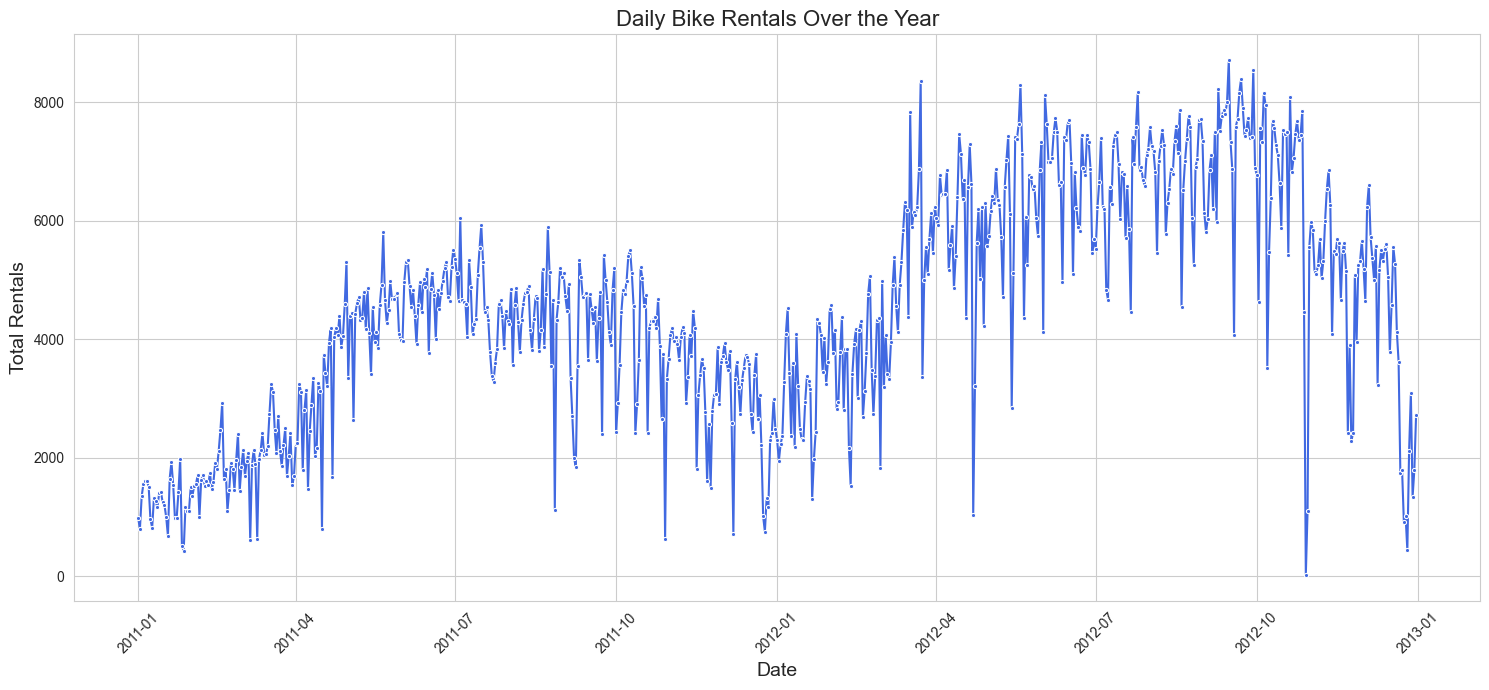

In [29]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 7))
sns.lineplot(x='dteday', y='cnt', data=day_df, marker='o', markersize=3, color='royalblue')

# Enhancing the plot with necessary details
plt.title('Daily Bike Rentals Over the Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Dari hasil di atas, kita dapat melihat bahwa pola permintaan sepeda berubah sepanjang tahun. Permintaan sepeda cenderung meningkat pada bulan-bulan musim panas dan cenderung menurun pada bulan-bulan musim dingin.

### Pertanyaan 2:

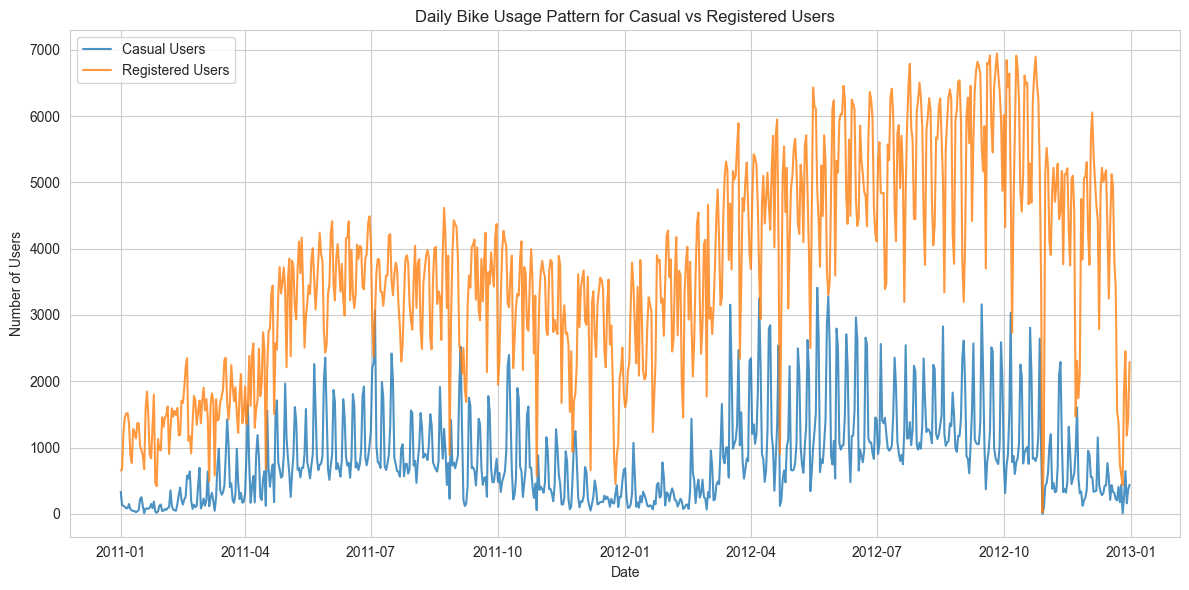

In [30]:
daily_data = all_df.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=daily_data, x='dteday', y='casual', label='Casual Users', alpha=0.8)

sns.lineplot(data=daily_data, x='dteday', y='registered', label='Registered Users', alpha=0.8)

plt.title('Daily Bike Usage Pattern for Casual vs Registered Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()

plt.show()

Dari hasil di atas, kita dapat mengamati beberapa hal:

1. Pengguna terdaftar secara konsisten memiliki jumlah pengguna yang lebih tinggi setiap hari dibandingkan dengan pengguna casual.
2. Terdapat fluktuasi musiman dalam penggunaan sepeda, dimana penggunaan meningkat di bulan-bulan yang lebih hangat dan menurun selama bulan-bulan yang lebih dingin.
3. Terlihat juga beberapa puncak penggunaan yang mungkin berkaitan dengan hari-hari tertentu dalam seminggu atau event khusus.

Berdasarkan pengamatan ini, kita bisa lanjutkan analisis dengan mengklasifikasikan hari berdasarkan total penggunaan (casual + terdaftar) dan melihat apakah terdapat pola yang menonjol berdasarkan hari dalam seminggu atau periode tertentu dalam tahun. Kita akan mengelompokkan data menjadi beberapa kategori berdasarkan total penggunaan harian dan kemudian menganalisis distribusi hari dalam seminguknya untuk melihat apakah ada pola yang dapat diidentifikasi.

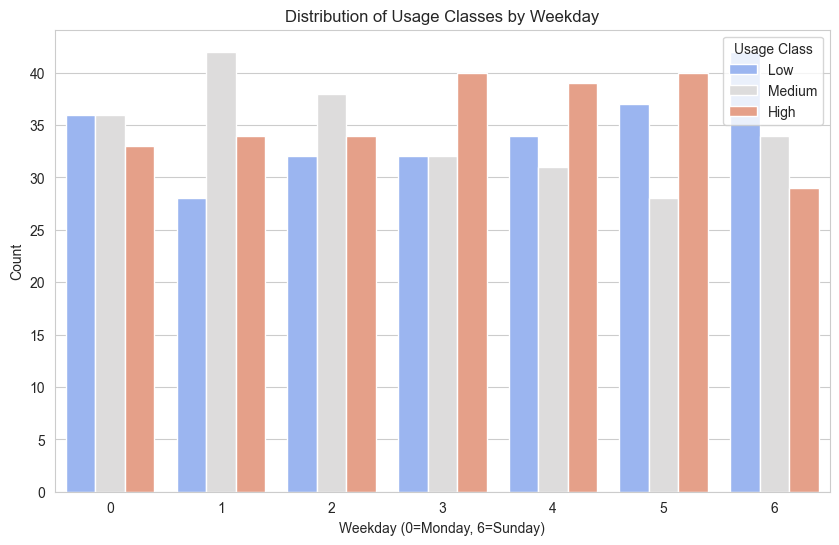

In [31]:
daily_data['total'] = daily_data['casual'] + daily_data['registered']

quantiles = daily_data['total'].quantile([0.33, 0.66])

def classify_usage(row):
    if row['total'] <= quantiles.iloc[0]:
        return 'Low'
    elif row['total'] <= quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'High'

daily_data['usage_class'] = daily_data.apply(classify_usage, axis=1)

daily_data['weekday'] = daily_data['dteday'].dt.weekday

plt.figure(figsize=(10, 6))

sns.countplot(x='weekday', hue='usage_class', data=daily_data, palette='coolwarm')
plt.title('Distribution of Usage Classes by Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.legend(title='Usage Class')

plt.show()

Dari hasil di atas, kita dapat melihat beberapa pola menarik:

1. Penggunaan "Rendah" cenderung didistribusikan merata sepanjang minggu.
2. Penggunaan "Sedang" dan "Tinggi" menunjukkan variasi, dengan peningkatan jumlah pada hari-hari tertentu, yang bisa menunjukkan preferensi hari penggunaan yang lebih tinggi, mungkin akhir pekan atau hari kerja tertentu.
3. Ada indikasi bahwa penggunaan "Tinggi" lebih sering terjadi di hari-hari tertentu, kemungkinan berkaitan dengan rutinitas kerja mingguan atau aktivitas rekreasi akhir pekan.

### Pertanyaan 3:

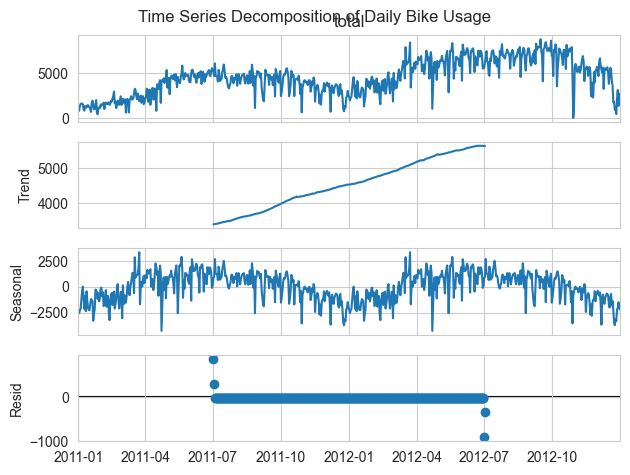

In [32]:
daily_data.set_index('dteday', inplace=True)

decomposition = seasonal_decompose(daily_data['total'], model='additive', period=365)

decomposition.plot()
plt.suptitle('Time Series Decomposition of Daily Bike Usage')
plt.show()

Dari hasil di atas, kita dapat melihat bahwa kita telah berhasil melakukan dekomposisi dari time series data yang kita miliki. Dari hasil dekomposisi ini, kita dapat melihat beberapa komponen utama:
1. Trend: Komponen tren menunjukkan perubahan jangka panjang dalam jumlah penggunaan sepeda. Dari grafik, kita dapat melihat ada fluktuasi dalam tren, yang bisa mencerminkan peningkatan atau penurunan popularitas layanan sepeda seiring waktu.
2. Seasonality: Komponen musimanitas menggambarkan pola yang berulang setiap tahun. Jelas terlihat ada pola musiman yang kuat, dengan penggunaan sepeda meningkat di bulan-bulan hangat dan menurun selama bulan-bulan dingin. Ini menekankan pentingnya faktor musim dalam penggunaan sepeda.
3. Residual: Sisa komponen setelah tren dan musimanitas dikeluarkan. Idealnya, residu harus random dan tidak menunjukkan pola tertentu, menandakan bahwa model telah berhasil menangkap informasi utama. Namun, fluktuasi dalam residu bisa menunjukkan adanya faktor lain yang tidak dijelaskan oleh model atau kebutuhan untuk pemodelan lebih lanjut.

## Conclusion

- Conclusion pertanyaan 1
Dari hasil analisis yang telah dilakukan, kita dapat menyimpulkan bahwa pola permintaan sepeda berubah sepanjang tahun. Permintaan sepeda cenderung meningkat pada bulan-bulan musim panas dan cenderung menurun pada bulan-bulan musim dingin. Ini mungkin disebabkan oleh perubahan cuaca dan musim yang mempengaruhi minat masyarakat untuk melakukan kegiatan di luar ruangan.


- Conclusion pertanyaan 2
Dari hasil analisis yang telah dilakukan, kita dapat menyimpulkan bahwa pengguna terdaftar secara konsisten memiliki jumlah pengguna yang lebih tinggi setiap hari dibandingkan dengan pengguna casual. Terdapat fluktuasi musiman dalam penggunaan sepeda, dimana penggunaan meningkat di bulan-bulan yang lebih hangat dan menurun selama bulan-bulan yang lebih dingin. Terlihat juga beberapa puncak penggunaan yang mungkin berkaitan dengan hari-hari tertentu dalam seminggu atau event khusus. Hal ini mungkin disebabkan oleh perubahan preferensi pelanggan dan perubahan strategi pemasaran yang dilakukan oleh perusahaan penyedia layanan sewa sepeda. Analisis ini memberikan wawasan tentang bagaimana pola penggunaan sepeda bervariasi menurut hari dalam seminggu, dengan kemungkinan implikasi untuk perencanaan operasional, seperti alokasi sepeda dan staf. Misalnya, hari dengan penggunaan "Tinggi" mungkin memerlukan lebih banyak sepeda yang tersedia atau staf tambahan untuk pemeliharaan.

- Conclusion pertanyaan 3
Dari hasil analisis yang telah dilakukan, kita dapat menyimpulkan bahwa kita telah berhasil melakukan dekomposisi dari time series data yang kita miliki. Analisis ini memberikan wawasan penting tentang bagaimana penggunaan sepeda dipengaruhi oleh waktu, dengan penekanan khusus pada perubahan musiman. Bisnis sepeda dapat menggunakan informasi ini untuk merencanakan alokasi sumber daya, seperti jumlah sepeda yang tersedia, staf untuk pemeliharaan, dan inisiatif pemasaran, lebih baik sepanjang tahun. Misalnya, mereka mungkin ingin meningkatkan kapasitas selama bulan-bulan musim panas untuk menampung peningkatan permintaan dan menyesuaikan strategi pemasaran mereka untuk menarik lebih banyak pengguna selama bulan-bulan dingin.